# Practical 1: GDP calculations

Learning objectives:

- Apply one of the methods to calculate national GDP using Eurostat data.  
- Know how to visualize GDP trend
- Analyse results and their implications

![GDP vs Nature](https://cdn.unenvironment.org/2022-02/shutterstock_1879675894.jpeg)

## Exercise 1
Using EUROSTAT data plot a graph showing the GDP trend of the Netherlands using the income approach

Data source 1: eurostat, national accounts, main GDP aggregates https://ec.europa.eu/eurostat/web/national-accounts/database

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
GDP_data = pd.read_csv("data/eurostat/nama_10_gdp_linear.csv.gz", compression="gzip")

In [3]:
# We are only interested in data in euros so make sure you slice the right currency
GDP_data = GDP_data[GDP_data.unit == "CP_MEUR"] 

In [4]:
# print the head of the dataframe to understand its structure
GDP_data.head()

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
294388,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1996,-545.8,NaN
294389,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1997,-492.5,NaN
294390,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1998,-575.1,NaN
294391,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,1999,-523.0,NaN
294392,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B11,AL,2000,-877.9,NaN


In [5]:
# Print all unique values in the National Account Item column (na_item) to use as a reference
GDP_data.na_item.unique()

array(['B11', 'B111', 'B112', 'B1G', 'B1GQ', 'B2A3G', 'D1', 'D11', 'D12',
       'D2', 'D21', 'D21X31', 'D2X3', 'D3', 'D31', 'P3', 'P31_S13',
       'P31_S14', 'P31_S14_S15', 'P31_S15', 'P32_S13', 'P3_P5', 'P3_P6',
       'P3_S13', 'P41', 'P51G', 'P52', 'P52_P53', 'P53', 'P5G', 'P6',
       'P61', 'P62', 'P7', 'P71', 'P72', 'YA0', 'YA1', 'YA2'],
      dtype=object)

you can check the statistical terms glossary for full definitions

https://data.un.org/Glossary.aspx

And the metadata accompanying the data to help you identify the codes relevant to your analysis https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm

## Income approach

Isolate all data for the income approach:
* Comp_employees = "D1"
* Gross operating surplus and mixed income = "B2A3G" 
* Taxes less subsidies on production and imports = "D2X3"

In [6]:
# select national account codes to be isolated in the data 
breakdown_income = ["D1", "B2A3G", "D2X3"]

In [7]:
# Isolate the items you want to analyse
GDP_breakdown = GDP_data[GDP_data.na_item.isin(breakdown_income)]
GDP_breakdown.head()

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
300583,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1995,68820.9,NaN
300584,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1996,70372.0,NaN
300585,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1997,71358.3,NaN
300586,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1998,74919.5,NaN
300587,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,AT,1999,77865.8,NaN


In [8]:
# Isolate the country you want to analyse

country = "NL"
country_data = GDP_breakdown[GDP_breakdown.geo==country]
country_data.head()

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
301438,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,NL,1995,139518.7,NaN
301439,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,NL,1996,143513.4,NaN
301440,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,NL,1997,151448.4,NaN
301441,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,NL,1998,160808.8,NaN
301442,ESTAT:NAMA_10_GDP(1.0),17/01/23 11:00:00,A,CP_MEUR,B2A3G,NL,1999,168001.0,NaN


In [9]:
# Collect your yearly data
yearly_GDP = {}

for year in country_data.TIME_PERIOD.unique():
    year_data = country_data[country_data.TIME_PERIOD==year]
    yearly_GDP[year] = year_data.OBS_VALUE.sum() * 1e-3 

# Plot your results!

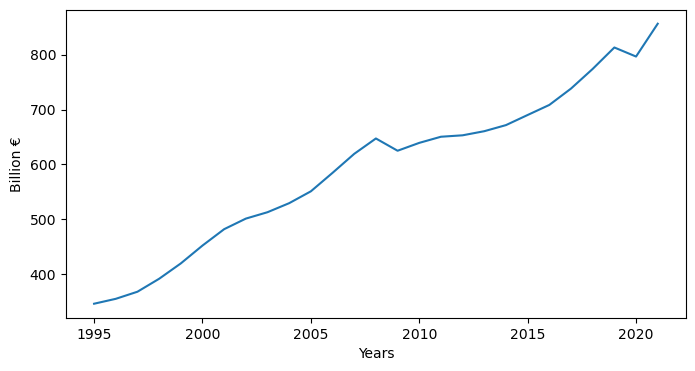

In [10]:
plt.figure(figsize=(8,4))
plt.xlabel("Years")
plt.ylabel("Billion €")
GDP_plot = plt.plot(yearly_GDP.keys(), yearly_GDP.values(), label=country)

### Exercise 2 - In groups of 3

Try to answer the following question
* What do the changes the line graph tell us?
* What can we hypothesise on the natural resources use and environmental emissions of those years?
* Do other countries show a different trend than the Netherlands?
* What can you tell about the historical natural resources use and emissions of one of those countries? 